## Assignment 4: k-fold Cross Validation, ROC Curve


**Submitted by: Indronil Bhattacharjee**

**Task 1. (k-NN classifier and 5-fold cross validation)**

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold

# Load the Crop Recommendation Dataset
url = "/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv"
data = pd.read_csv(url)

# Separate features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the range of k values to test
k_values = list(range(1, 51))

# Initialize variables to store the best k and its corresponding accuracy
best_k = None
best_accuracy = 0

# Perform 5-fold cross-validation to select the best k
kf = KFold(n_splits=5, shuffle=True)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []

    for train_idx, val_idx in kf.split(X_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        knn.fit(X_fold_train, y_fold_train)
        fold_accuracy = knn.score(X_fold_val, y_fold_val)
        accuracies.append(fold_accuracy)

    mean_accuracy = np.mean(accuracies)

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

# Train the k-NN classifier with the best k on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the k-NN classifier on the test set
test_accuracy = best_knn.score(X_test, y_test)

# Print the selected k and test accuracy
print(f"Selected k: {best_k}")
print(f"Test accuracy with k-NN (k={best_k}): {test_accuracy:.4f}")

Selected k: 7
Test accuracy with k-NN (k=7): 0.9705


**Task 2. (ROC Curve)**

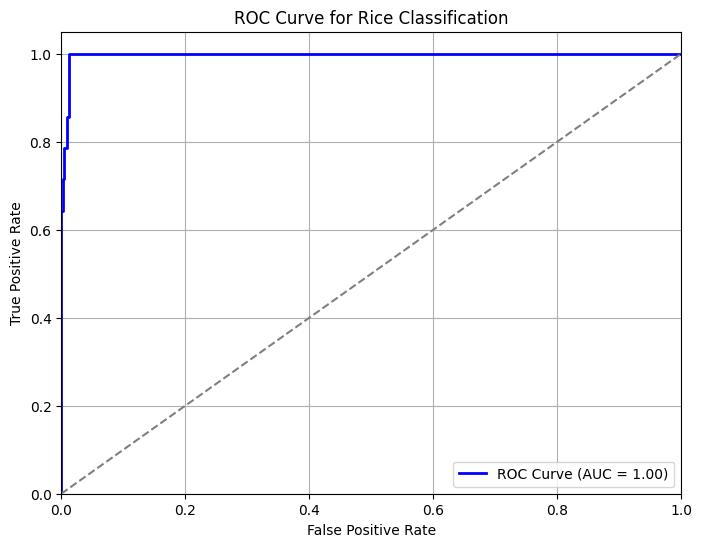

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Replace class labels to binary (rice vs. non-rice)
data['label'] = np.where(data['label'] == 'rice', 'rice', 'non-rice')

# Separate features and labels
X = data.drop('label', axis=1)
y = (data['label'] == 'rice').astype(int)  # Convert to binary (1 for rice, 0 for non-rice)

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression classifier
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

# Predict probabilities for the positive class (rice)
y_prob_rice = logistic_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rice)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob_rice)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Rice Classification')
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()

**Task 3. (SMS Text Classification)**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the SMS Spam Collection Data Set
url = "/kaggle/input/spam-sms-dataset/SMSSpamCollection.txt"
sms_data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Split the data into training (80%) and test (20%) sets
X = sms_data['message']
y = sms_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create TF-IDF vectorizer and transform the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_tfidf, y_train)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_tfidf, y_train)

# Evaluate SVM classifier
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Evaluate Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print accuracies and confusion matrices
print("SVM Classifier Accuracy:", accuracy_svm)
print("SVM Classifier Confusion Matrix:")
print(confusion_matrix_svm)

print("\nRandom Forest Classifier Accuracy:", accuracy_rf)
print("Random Forest Classifier Confusion Matrix:")
print(confusion_matrix_rf)

SVM Classifier Accuracy: 0.9937219730941704
SVM Classifier Confusion Matrix:
[[966   0]
 [  7 142]]

Random Forest Classifier Accuracy: 0.9838565022421525
Random Forest Classifier Confusion Matrix:
[[966   0]
 [ 18 131]]
